# Slackalysis: A short analysis of #interns-2018

I'm Qais, and I'm one of the two interns working hard to make _your Ed better_. We work on MyEd!

Our daily routine consists of various meetings, crazy lunches with our fellow interns, and tapping away at keyboards **writing code**.

Writing code is my life's work, and so I've decided to take this opportunity
to learn `matplotlib` and write this blog post in `markdown`, all in Jupyter!



**So lets go discover all the secrets of Information Services' summer intern cohort.**

Oh, and I'm not a statistician. I apologise if some of these graphs are _just plain wrong_. **You have been warned.**

## Exhibit A: Who are our interns?

Lets load our `metadata.json`, include some terrible XSS prevention, and print out our lovely interns...

In [1]:
import json
from IPython.core.display import display, HTML

def generate_member_card(member):
    return """
        <div style='display:flex; justify-content: center;align-items:center; margin-right:1em;margin-bottom:1em; background-color:rgba(127,127,127,0.1);padding:1em'>
            <img width=70 height=70 style='margin-right:1em' src='{profile[image_72]}'>
            <span>
                <strong>{real_name}</strong>
                <br/>
                <em>a.k.a.</em> {name}
            </span>
        </div>""".format(**member)

# Load member map
with open('private/metadata.json') as json_data:
    d = json.load(json_data)
    members = d['users']

# People whose real names need to be overridden
member_real_names = {
    # because not full name
    'UB6UG7S5T': 'Kalvin Wolf',
    'UB6PCS97F': 'Cec Plascott',
    'UB97ZNU1L': 'Osariemen Erhahon (IK)',

    # potential to be top dog hackers
    'UB5U600D6': 'Anita Klementiev', # inf
    'UB6N0S718': 'Anirudh Gangwal', # inf
    'UB21QG2KA': 'Ben Sheffield', # inf
    'UB6KMMSGJ': 'Perry Liu', # has been in forrest hill
}

# Who's a good intern?!
display(HTML("<h3>These are our beautiful (slack-using) interns!</h3>"))
table = "<div style='display:flex; flex-wrap: wrap'>"
for id, member in members.items():
    if id in member_real_names:
        member['real_name'] = member_real_names[id]
    #print(member)
    table += generate_member_card(member)
display(HTML(table + "</div>"))


## Exhibit B: Chatty Interns

I wonder who the most chatty intern is...

Lets first load up all our messages:

In [2]:
# Load intern data whoo
with open('private/interns-2018.json') as json_data:
    d = json.load(json_data)
    messages = d['messages']

# some people were silly, so lets filter out problematic messages
def is_problematic(m):
    return 'bot_id' not in m and 'user' in m and m['user'] != "USLACKBOT"
messages = list(filter(is_problematic, messages))

And now, to find the chattiest intern...

In [3]:
# map each message to just the user id.
msg_usrs = list(map(lambda m: m['user'], messages))

# sort that list
msg_usrs.sort()

from itertools import groupby
msg_usr_freq = {}
for usr, group in groupby(msg_usrs):
    if usr in members:
        msg_usr_freq[usr] = len(list(group))

msg_usr_freq = {k: v for k, v in msg_usr_freq.iteritems() if k in members}

def map_usr_to_freq(key):
    return msg_usr_freq[key]

top_chatters = sorted(msg_usr_freq, key=map_usr_to_freq, reverse=True)

table = "<h3>Here are the top 4 noisiest interns!</h3><table><thead><tr><th>Count</th><th>Intern</th></thead><tbody>"
for i in range(4):
    id = top_chatters[i]

    freq = msg_usr_freq[id]
    #print(id, freq)
    card = generate_member_card(members[id])
    table += "<tr><td><h1>" + str(freq) + "</h1></td><td>" + card + "</td></tr>"

table += "</tbody></table>"

display(HTML(table))


Count,Intern
250,Qais Patankar a.k.a. qaisjp
221,Lila Pitcher a.k.a. lpitcher
89,Cec Plascott a.k.a. cplascot
75,Perry Liu a.k.a. p.liu


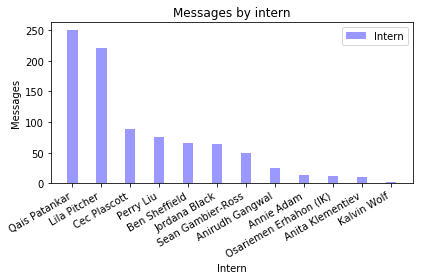

In [10]:

import numpy as np
import matplotlib.pyplot as plt

counts = map(map_usr_to_freq, top_chatters)

fig, ax = plt.subplots()
fig.autofmt_xdate()

index = np.arange(len(counts))
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, counts, bar_width,
                alpha=opacity, color='blue',
                label='Intern')

ax.set_xlabel('Intern')
ax.set_ylabel('Messages')
ax.set_title('Messages by intern')
ax.set_xticks(index)

def chatter_names(id):
    return members[id]["real_name"]

ax.set_xticklabels(map(chatter_names,top_chatters))
ax.legend()

fig.tight_layout()
plt.show()



# Intermission

Phew! That was a lot of work!

I use my self-managed machine at work and on Thursday afternoon last week I decided to give in my laptop for servicing. These past couple of days I've been using my managed Windows 7 machine and I can clearly see that my efficiency at work has been fairly stunted.

I don't have Python on my home machine (Windows 10, so I can play beautiful games like _Batman: Arkham City_, which, by the way, I snuck in an hour of before work today. Fab game, and the combat is so much better than _Arkham Asylum_).

I can get by fairly well with just an SSH connection - I'll just connect to Informatics' DICE machines and run things over the network there. The thing is, these machines don't have _MinGW_ or _putty_ pre-installed (I was later reminded that Putty can just be downloaded...) — time to explore other options!

Informatics is trialling their fantastic new RDP service, and it works... well. Browsers over RDP are still a little bit too slow, and there's no hope making it my primary desktop, especially with the way that Windows handles keyboard shortcuts.

I tried Virtual DICE. It took a while to download, even over EdLAN. I guess I've been spoiled with the Appleton Tower MSR and [TARDIS](https://tardis.ed.ac.uk) being in the same building.

It took even longer to get Virtualisation enabled in the system BIOS. Whenever I booted up my Windows university-managed PC I never saw the BIOS screen. Pressing a function key on boot would always just result in a clear blank screen — no display output. It was clear that it was going into some sort of BIOS, I just couldn't see it!

Fastboot, you say? [Nope!](https://www.youtube.com/watch?v=gvdf5n-zI14) After a bit of shuffling about with my partner in crime (Ben, who you'll hear more from in four weeks time) we discovered there's an external GPU connected (to the motherboard, not connected to a monitor) and we figured the BIOS was showing up on there. I didn't want to unseat the graphics card, so I put things back to the way it was and called over our fabulous computer rep, Callum. We were right, he unseated the exGPU, we enabled virtualization, and now I could finally start a virtual machine.

So my discovery of having an (unused) exGPU let me to go and try PCI passthrough. TL;DR: it didn't work.

I allocated 6 gigs out of 8 of my system memory to VirtualBox and it turns out that breaks your host machine, especially if it's running Chrome! I always defend Chrome when people say it's a memory hog (memory is meant to be used!), but _darn_, it does _not_ function well in a low memory environment. But it's kind of OK if I'm trying to use this VM as a "primary machine"...


So I installed VirtualBox Guest Tools and enabled "auto keyboard capture". Now the interface is fast, the hardware cursor is in use and it's all silky smooth; and that makes me a happy man! I use xmonad on DICE, and that uses the Super key (Windows key). I'm not remapping my entire `xmonad.hs` config.

But the Windows key is obviously being captured by my host machine. So I go and disable "auto keyboard capture" and yay, I can now use xmonad properly...

Oh no... the mouse is slow now...

We've all been moved to the hot desks now (..) so I've cheekily made use of the "testing machines" — one with macOS — so I can enjoy having real SSH.

And now I have jupyter working!

![image.png](https://i.imgur.com/mXxFZII.png)

Now, to return to my 12 hour attempt at statistics.

## Exhibit C: Reacts

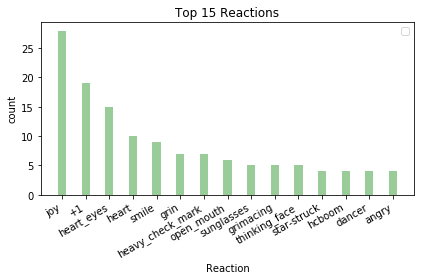

In [5]:
#print((messages[10:30]))
reacted_messages = filter(lambda m: 'reactions' in m, messages)

# Print len(reacted_messages)
display(HTML("There are <strong>" + str(len(reacted_messages)) + "</strong> messages that have been reacted to!"))

# Calculate {react: count, ...}
from collections import Counter
react_counts = Counter()

for m in reacted_messages:
    for r in m['reactions']:
        react_counts[r['name']] += 1

def counter_to_sorted(c, key=False, reverse=False):
    names = list(c)
    names.sort(key=lambda x: key and x or c[x], reverse=not reverse)
    return list(map(lambda k: (k, c[k]), names))

#react_names = list(react_counts)
#react_names.sort(key=lambda x: react_counts[x], reverse=True)
#react_counts_sorted = map(lambda k: (k, react_counts[k]), react_names)
react_counts_sorted = counter_to_sorted(react_counts)

for react in react_counts_sorted[:10]:
    display(HTML("<code>:{}:</code> ... {} times!".format(react[0], react[1])))
    

def draw_sorted(tuple_list, xlabel, ylabel, title, color, line=False):
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    index = np.arange(len(tuple_list))
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    fn = ax.bar
    if line:
        fn = ax.plot
    rects1 = fn(index, list(map(lambda x: x[1], tuple_list)), bar_width,
                alpha=opacity, color=color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(index)

    ax.set_xticklabels(map(lambda x: x[0],tuple_list))
    ax.legend()

    fig.tight_layout()
    plt.show()

draw_sorted(react_counts_sorted[:15], "Reaction", "count", "Top 15 Reactions", "g")
#print(react_counts_sorted[:10])

What about each person's most fav react?

In [6]:
from collections import defaultdict
person_faves = defaultdict(Counter)

for m in reacted_messages:
    for react in m['reactions']:
        for user in react['users']:
            if user in members:
                person_faves[user][react['name']] += 1

person_faves = dict(person_faves)
for key, val in person_faves.items():
    s = counter_to_sorted(val)
    max = s[0][1]
    s = filter(lambda m: m[1] == max, s)
    person_faves[key] = s
    

for id, l in person_faves.items():
    name = members[id]['real_name']
    
    freq = l[0][1]
    react_str = " ".join(map(lambda r: "<code>:"+r[0]+":</code>", l))
    display(HTML("<strong>{}</strong> said these mentions {} time(s): {}".format(name, freq, react_str)))
    #print(name, react_str)

    

## Another Exhibit: Messages over time

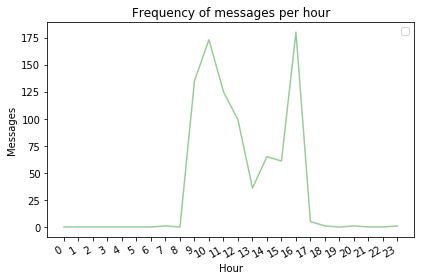

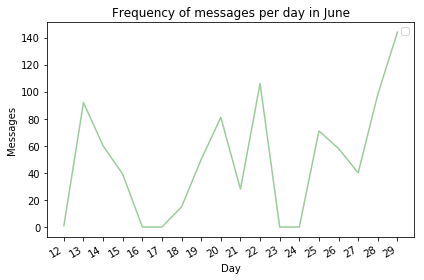

In [7]:
import datetime

hours = Counter()
for i in range(24):
    hours[i] = 0

june_days = Counter()
for i in range(12, 30):
    june_days[i] = 0

def describe_ts(ts):
    #print(ts)
    t = datetime.datetime.fromtimestamp(float(ts))
    june_days[t.day] += 1
    hours[t.hour] += 1

for m in messages:
    describe_ts(m['ts'])

hours_sorted = counter_to_sorted(hours, key=True, reverse=True)
june_days_sorted = counter_to_sorted(june_days, key=True, reverse=True)

draw_sorted(hours_sorted, "Hour", "Messages", "Frequency of messages per hour", "g", line=True)
draw_sorted(june_days_sorted, "Day", "Messages", "Frequency of messages per day in June", "g", line=True)


## Final Exhibit: Words

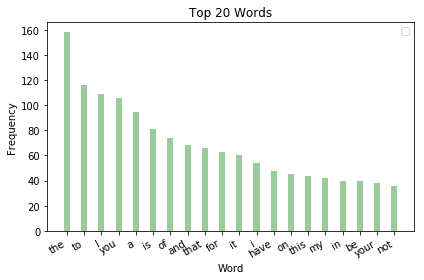

In [8]:
words_counter = Counter()
mentioned_counter = Counter()

def get_user(str):
    l = len(str)
    if l < 3:
        return None
    if str[:2] != "<@":
        return None
    if str[l-1:l] != ">":
        return None
    return str[2:l-1]

for m in messages:
    for w in m['text'].split(' '):
        u = get_user(w)
        if u == None:
            words_counter[w] += 1
        elif u in members:
            mentioned_counter[u] += 1

words_sorted = counter_to_sorted(words_counter)
mentioned_sorted = counter_to_sorted(mentioned_counter)

#print(words_sorted)

draw_sorted(words_sorted[:20], "Word", "Frequency", "Top 20 Words", "g")


**Booooring!** What about the top _mentioned_ people?

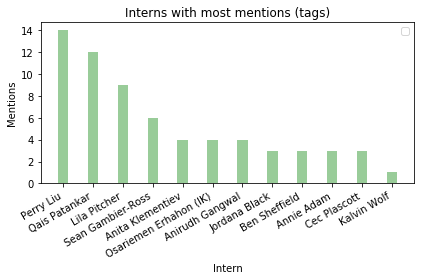

In [9]:
mentioned_sorted_names = list(map(lambda mention: (members[mention[0]]['real_name'], mention[1]), mentioned_sorted))
draw_sorted(mentioned_sorted_names, "Intern", "Mentions", "Interns with most mentions (tags)", "g")

## Expansion

All this code was basically written in a 12 hour span. You can find the code [published on GitHub](https://github.com/qaisjp/notebook-slackalysis), and you can also [find a HTML version of this](https://tardis.ed.ac.uk/~qaisjp/interns-2018-blog.html). There's no personal data (or documentation), but you can run the right scripts to pull it from Slack yourself.

Some cool things to add would be some inter-relational statistics (I made up that term). Which interns mention _each other_ the most?

Anyway — I hope you've enjoyed this little insight into life as an intern at Information Services. We sure do make the best use of Slack.

\- Qais